## Dátová množina - Telco Customer (záverečné zadanie)

Pre účely zadania budeme pracovať s dátamo v oblasti telekomunikácií. Dataset (súbor `Telecom-Churn.csv` v adresári `data`) obsahuje informácie o zákazníkoch telekomunikačného operátora vrátane informácií o nich samotných a informáciach o službách, ktoré u daného operátora majú aktivované. 
Cieľom je vytvoriť prediktívny model, ktorý bude predpovedať (na základe informácií o zákazníkoch), či od telekomunikačného operátora odídu alebo nie (atribút `Churn`). 

Popis dát:

* customerID - identifikátor zákazníka
* gender - pohlavie zákazníka
* SeniorCitizen - udáva, či je zákazník senior, alebo nie (1, 0)
* Partner - udáva, či má zákazník partnera, alebo nie (Yes, No)
* Dependents - udáva, či má zákazník ľudí na ňom závislých alebo nie (Yes, No)
* tenure - ako dlho je už zákazník zákazníkom telekomunikačnej spoločnosti (v mesiacoch)
* PhoneService - udáva, či zákazník má telefonickú službu alebo nie (Yes, No)
* MultipleLines - či zákazník používa viacero liniek (čísel) (Yes, No, No phone service)
* InternetService - typ pripojenia zákanzíkna na internet (DSL, Fiber optic, No)
* OnlineSecurity - udáva, či používateľ používa službu zabezpečenia pripojenia (Yes, No, No internet service)
* OnlineBackup - udáva, či používateľ používa službu online zálohovania (Yes, No, No internet service)
* DeviceProtectionWhether - používanie zabezpečenia zariadenia (Yes, No, No internet service)
* TechSupport - služba technickej podpory (Yes, No, No internet service)
* StreamingTV - služba streamovanej televízie (Yes, No, No internet service)
* StreamingMovies - služba streamovania filmov (Yes, No, No internet service)
* Contract - typ kontraktu, ktorý zákazník uzavrel (Month-to-month, One year, Two year)
* PaperlessBilling - či má aktivovanú službu výpisov účtov elektronicky (Yes, No)
* PaymentMethod - spôsob platby (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges - mesačná výška platby
* TotalCharges - celková výška platby
* Churn - cieľový atribút - či používateľ odišiel od operátora alebo nie (Yes or No)


### Úloha 1 - Načítanie dát (2b)

Načítajte dáta do dátového rámca a odstráňte nepotrebné atribúty, ktoré sa nedajú využiť pri analýze dát.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

telecom=pd.read_csv("../data/Telecom-CHurn.csv")

telecom.drop(columns=["CustomerID"], inplace=True)

telecom.head()


### Úloha 2 - Základné štatistiky (4b)

* Pre číselné atribúty vypočítajte základné štatistiky a vizualizujte distribúciu pravdepodobnosti výskytu hodnôt.
* Pre nominálne/ordinálne atribúty vypočítajte početnosti hodnôt. Vykreslite pre ne histogramy.
* Pre každý atribút vypočítajte počet chýbajúcich hodnôt.

In [4]:
telecom.columns.values

array(['Unnamed: 0', 'CustomerID', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'Tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'], dtype=object)

C:\Users\informatika\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\informatika\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


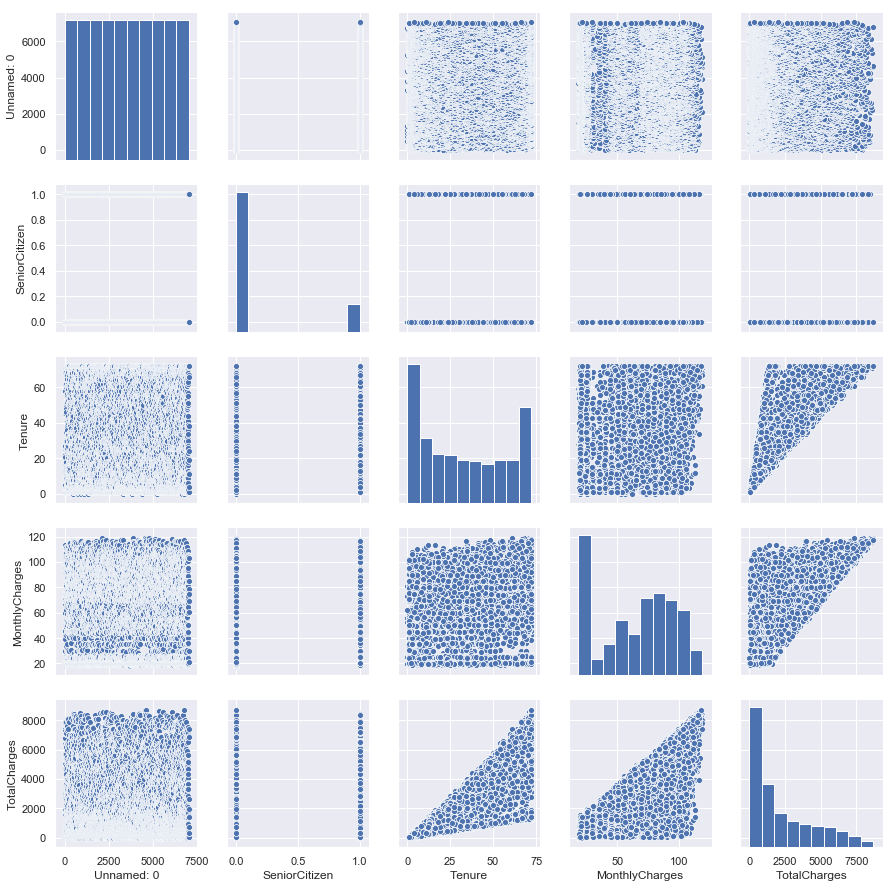

In [66]:
p=sns.pairplot(telecom)

In [ ]:
telecom["Tenure"].value_counts()

In [ ]:
telecom["MonthlyCharges"].value_counts()

In [ ]:
telecom["TotalCharges"].value_counts()

In [ ]:
telecom["Gender"].value_counts()

In [ ]:
g=sns.countplot(x="Gender", data=telecom)

In [ ]:
telecom["SeniorCitizen"].value_counts()

In [ ]:
g=sns.countplot(x="SeniorCitizen", data=telecom)

In [ ]:
telecom["Partner"].value_counts()

In [ ]:
g=sns.countplot(x="Partner", data=telecom)

In [ ]:
telecom["Dependents"].value_counts()

In [ ]:
g=sns.countplot(x="Dependents", data=telecom)

In [ ]:
telecom["PhoneService"].value_counts()

In [ ]:
g=sns.countplot(x="PhoneService", data=telecom)

In [ ]:
telecom["InternetService"].value_counts()

In [ ]:
g=sns.countplot(x="InternetService", data=telecom)

In [ ]:
telecom["StreamingTV"].value_counts()

In [ ]:
g=sns.countplot(x="StreamingTV", data=telecom)

In [ ]:
telecom["StreamingMovies"].value_counts()

In [ ]:
g=sns.countplot(x="StreamingMovies", data=telecom)

In [ ]:
telecom["Contract"].value_counts()

In [ ]:
g=sns.countplot(x="Contract", data=telecom)

In [5]:
telecom.dtypes

Unnamed: 0            int64
CustomerID           object
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
telecom.TotalCharges=pd.to_numeric(telecom.TotalCharges, errors="coerce")
telecom.isnull().sum()

Unnamed: 0           0
CustomerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents          20
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        11
Churn                0
dtype: int64

In [16]:
telecom.dropna(inplace=True)
df2=telecom.iloc[:,1:]
df2["Churn"].replace(to_replace="Yes", value=1, inplace=True)
df2["Churn"].replace(to_replace="No", value=0, inplace=True)
df_dummies=pd.get_dummies(df2)
df_dummies.head()


,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Churn,CustomerID_0002-ORFBO,CustomerID_0003-MKNFE,CustomerID_0004-TLHLJ,CustomerID_0011-IGKFF,CustomerID_0013-EXCHZ,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [52]:
telecom=pd.read_csv("../data/Telecom-Churn.csv")
telecom.describe()

,Unnamed: 0,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7017.000000,7032.000000
mean,3521.000000,0.162147,32.371149,64.707482,2283.300441
std,2033.283305,0.368612,24.559481,30.105503,2266.771362
min,0.000000,0.000000,0.000000,18.250000,18.800000
25%,1760.500000,0.000000,9.000000,35.400000,401.450000
50%,3521.000000,0.000000,29.000000,70.300000,1397.475000
75%,5281.500000,0.000000,55.000000,89.850000,3794.737500
max,7042.000000,1.000000,72.000000,118.750000,8684.800000


In [ ]:
l=list(telecom.columns.values)
for i in range(len(1)):
    print("Atribut:"+1[i]+"/pocet chybajucich hodnot"+str(telecom[1[i]].isna().sum()))

### Úloha 3 - Závislosti medzi číselnými atribútmi (3b)

Vypočítajte korelačnú maticu pre číselné atribúty a identifikujte, ktoré atribúty sú najviac korelované.

In [ ]:
corr_table=telecom.corr()
corr_table

In [ ]:
p=sns.heatmap(corr_table, xticklabels=corr_table.columns, yticklabels=corr_table.columns, vmin=-1, vmax=1, cmap="coolwarm", square=True)

In [ ]:
p=sns.lmplot(telecom=telecom, x="petal_length", y="petal_width", fit_reg=True)

In [ ]:
p=sns.pairplot(telecom)

In [ ]:
plt.figure(figsize=(15,8))
df_dummies.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")


### Úloha 4 - Diskretizácia hodnôt (4b)

* Diskretizujte číselné atribúty `MonthlyCharges` a `TotalCharges` do 5 rovnako veľkých intervalov.
* Diskretizujte číselný atribút `Tenure` na 5 intervalov s rovnakou početnosťou príkladov.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


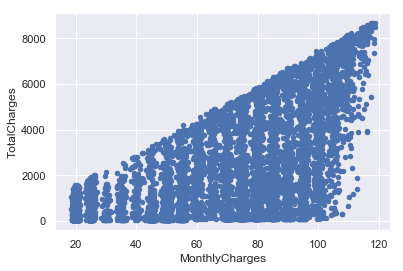

In [19]:
telecom[["MonthlyCharges", "TotalCharges"]].plot.scatter(x="MonthlyCharges", y="TotalCharges")

In [ ]:
telecom["MonthlyCharges"]=pd.cut(telecom["MonthlyCharges"], 5,labels=["vysoká", "stredne vysoká", "stredná", "stredne nízka", "nízka"])
telecom["MonthlyCharges"].value_counts()

In [ ]:
telecom["TotalChanges"]=pd.cut(telecom["MonthlyCharges"], 5,labels=["vysoká", "stredne vysoká", "stredná", "stredne nízka", "nízka"])
telecom["TotalChanges"].value_counts()

In [ ]:
telecom["Tenure"]=pd.cut(telecom["MonthlyCharges"], 5,labels=["velmi dlho", "dlho", "stredne", "krátko", " velmi krátko"])
telecom["Tenure"].value_counts()

In [ ]:
telecom.head(5)

### Úloha 5 - Závislosti medzi nominálnymi/ordinálnymi atribútmi (5b)

* Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi `Tenure`, `MonthlyCharges`, `TotalCharges` a atribútom `Churn` (využite diskretizovanie hodnôt z úlohy 4). Závislosti vizualizujte vhodným spôsobom pomocou knižnice Seaborn.
* Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi `Gender`, `SeniorCitizen` a atribútom `Churn`.
* Pomocou krížovej tabuľky zistite početnosť rôznych kombinácií služieb pre atribúty `PhoneService`, `InternetService`, `StreamingTV`, `StreamingMovies`. Početnosti vizualizujte aj pomocou Seaborn knižnice.

In [ ]:
telecom["Churn"]=telecom["Churn"].map({"Yes":1, "No":0})
pd.pivot_table(telecom, index="Tenure", values="Churn")

In [ ]:
pd.pivot_table(telecom, index="MonthlyCharges", values="Churn")

In [ ]:
pd.pivot_table(telecom, index="TotalCharges", values="Churn")

In [ ]:
# este mozno...neviem
x=sns.kdeplot(telecom.MonthlyCharges[(telecom["Churn"]=="No")],color="Pink", shade="True")
x=sns.kdeplot(telecom.MonthlyCharges[(telecom["Churn"]=="Yes")],ax=ax, color="Blue", shade="True")
ax.legend(["Not Churn", "Churn"], loc="upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Monthly Charges")
ax.set_title("Distribution of monthly charges by churn")

In [ ]:
# este mozno... neviem
ax=sns.kdeplot(telecom.MonthlyCharges[(telecom["Churn"]=="No")],color="Pink", shade="True")
ax=sns.kdeplot(telecom.MonthlyCharges[(telecom["Churn"]=="Yes")],ax=ax, color="Blue", shade="True")
ax.legend(["Not Churn", "Churn"], loc="upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Total Charges")
ax.set_title("Distribution of total charges by churn")

In [ ]:
pd.pivot_table(telecom, index=["Tenure", "MonthlyChanges", "TotalChanges"], values="Churn")

In [ ]:
pd.pivot_table(telecom, index="Gender", values="Churn")

In [ ]:
pd.pivot_table(telecom, index="SeniorCitizen", values="Churn")

In [ ]:
pd.pivot_table(telecom, index="Gender","SeniorCitizen" values="Churn")

In [ ]:
pd.crosstab(index=telecom["PhoneService"], columns=telecom["InternetService"], telecom["StreamingTV"], telecom["StreamingMivies"])

In [ ]:
g=sns.countplot(y="PhoneService", hue="InternetService", data=telecom)

### Úloha 6 - Nahradenie chýbajúcich hodnôt (5b)

* Vhodným spôsobom nahraďte chýbajúce hondnoty v atribúte `MonthlyCharges` v závislosti od atribútu `TotalCharges` a `Tenure`.
* Pre hodnoty `TotalCharges` porozmýšľajte nad odvodením chýbajúcich hodnôt na základe `Tenure`.
* Vhodným spôsobom nahraďte chýbajúce hodnoty v atribúte `Dependents` v závislosti od atribútov `Gender` a `Partner`.

In [ ]:
def replace_missing_TotalCharges(row):
    TotalCharges=row["TotalCharges"]
    tenure=row["Tenure"]
    if pd.isna(TotalCharges):
        return ptable["TotalCharges"][Tenure]
    else:
        return TotalCharges
    
telecom["TotalCharges"]= telecom.apply(replace_missing_TotalCharges, axis=1)
telecom["TotalCharges"].isna().sum()

In [ ]:
def replace_missing_MonthlyCharges(row):
    TotalCharges=row["TotalCharges"]
    tenure=row["Tenure"]
    MonthlyCharges=row["MontlyCharges"]
    if pd.isna(MonthlyCharges):
        return TotalCharges/ten
    else:
        return MonthlyCharges
    
telecom["MonthlyCharges"]= telecom.apply(replace_missing_MonthlyCharges, axis=1)
telecom["MonthlyCharges"].isna().sum()

In [ ]:
ctable=pd.crosstab(telecom["Dependens"], [telecom["Partnes"], telecom["Gender"]])
print
# dependents je ovplyvnený len atributom Partners

### Úloha 7 - Odvodenie nových atribútov (5b)

* Vytvorte nový atribút `TotalMonthCharges`, ktorého hondoty sú rovné `MonthlyCharges * Tenure`.
* Vytvorte nový atribút `TotalRatio` ktorý bude mať hodnotu -1 ak `TotalMonthCharges < TotalCharges`, 0 ak `TotalMonthCharges = TotalCharges` a +1 ak `TotalMonthCharges > TotalCharges`.

In [ ]:
telecom["TotalMonthCharges"]=telecom.eval("MonthlyCharges*Tenure")
p=telecom["TotalMonthCharges"].hist()
telecom["TotalRatio"]=telecom.eval(0)

def calculate_TotalRatio(row):
    TotalMonthCharges=row["TotalMonthCharges"]
    TotalCharges=row["TotalCharges"]
    if TotalMonthCharges<TotalCharges:
        return -1
    elif TotalMonthCharges=TotalCharges:
        return 0
    else:
        return 1
telecom["TotalRatio"]=telecom.apply(calculate_TotalRatio, axis=1)
pd.set_option("display.max_columns", 30)
telecom.head(5)

### Úloha 8 - Prevedenie dát do podoby vhodnej pre modelovanie (5b)

Predspracovaný dátový rámec preveďte do podoby vhodnej pre modelovanie:
* Použite vhodný spôsob transformovania kategorických atribútov
* Použite normalizáciu zvolených atribútov pre modely, pre ktoré je normalizácia vhodná
* Zvoľte, ktoré z atribútov (pôvodných a vytvorených/transformovaných) použijete pri tvorbe modelov.

In [ ]:
telecom=pd.read_csv("../data/telecom_full.csv")
telecom.head(30)

In [ ]:
telecom=telecom.drop(columns=["PhoneService", "TotalMonthChanges", "Tenure", "MonthyChanges", "TotalChanges", "PaperlessBilling", "OnlineSecurity", "DeviceProtection", "TechSupport"])
telecom.head()

In [ ]:
telecom["Gender"]=telecom["Gender"].map({"Male":0, "Female":1})
telecom["SeniorCitizen"]=telecom["SeniorCitizen"].map({"No":0, "Yes":1})
telecom["Partner"]=telecom["Partner"].map({"No":0, "Yes":1})
telecom["Dependents"]=telecom["Dependents"].map({"No":0, "Yes":1})
telecom["MultipleLines"]=telecom["MultipleLines"].map({"No phone srvice":0, "No":1, "Yes":2})
telecom["InternetService"]=telecom["InternetService"].map({"No":0, "DSL":1, "Fiber optic":2})
telecom["OnlineBackup"]=telecom["OnlineBackup"].map({"No internet service":0, "No":1, "Yes":2})
telecom["StreamingTV"]=telecom["StreamingTV"].map({"No internet service":0, "No":1, "Yes":2})
telecom["StreamingMovies"]=telecom["StreamingMovies"].map({"No internet service":0, "No":1, "Yes":2})
telecom["Contract"]=telecom["Contract"].map({"Month-to-month":0, "One year":1, "Two year":2})
telecom.head()

In [ ]:
telecom.to_csv("../data/telecom_processed.csv", index=False)

### Úloha 9 - Rozdelenie dát na trénovanie a testovanie (2b)

* Rozdeľte dátovú množinu do matice príznakov a vektora hodnôt cieľového atribútu
* Rozdeľte dáta do trénovacej a testovacej množiny v pomere 70/30.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_telecom,y_telecom, test_size=0.3, random_state=1)
print("Množina trenovania")
print(X_train.shape)
print(y_train.shape)
print("Množina testovania")
print(X_test.shape)
print(y_test.shape)

### Úloha 10 - Natrénovanie klasifikačných modelov a nájdenie optimálnych parametrov (6b)

Natrénujte klasifikačné modely rôznych typov (Stromy, kNN, Naive Bayes, Random Forests). Pre nájdenie optimálnych parametrov modelov jednotlivých typov modelov použite GridSearch. V rámci GridSearch modely validujte 5- násobnou krížovou validáciou a ako metriku pre ich vyhodnotenie použite `accuracy`.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

#stromy

criterion_range=["gini", "entropy"]
max_dept_range=[1,2,3,4,5,6,7,8,9,10]
min_samples_split_range=[2,4,8,10]
min_samples_leaf_range=[1,5,10,15]
presort_range=[True, False]
param_grid=dict(criterion=criterion_range, max_depth=max_depth_range, min_samples_split=min_samples_split_range, min_samples_leaf=min_samles_leaf_range, presort=presort_range)
print(param_grid)
dtree=DecisionTreeClassifier()
grid=GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring="accuracy")
grid.fit(X_trail, y_trail)
print("Najlepšia kombinácia parametrov je:")
print(grid.best_params_)
print()
print("A hodnota presnosti modelu pri tejto kombinácii je:")
print(grid_best_score_)


In [ ]:
# knn
from sklearn.neighbors import KNeighborsClassifier
k_range=list(range(1,30))
param_grid_knn=dict(n_neighbors=k_range)
knn=KNeighborsClassifier()
grid_knn=GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring="accuracy")
grid_knn.fit(X_train, y_train)
print("Najlepsie parametre")
print(grid_knn.best_params)
print("Hodnota presnosti parametrov")
print(grid_knn.best_score)

In [ ]:
# nb
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
telecom_prediction_alg(gnb, os_smote_X, test_X, os_smote_Y, test_Y)

In [ ]:
# RF
from sklearn.ensemble import RandomForestClassifier
from sklearn.metric import accuracy_score, confusion_matrix
rf=RandomForestClassifier(n_estimators=1000, max_depth=3)
rf.fit(X_train, y_train)

### Úloha 11 - Porovnanie modelov pomocou ROC kriviek (4b)

* Modely otestujte na testovacej množine a modely jednotlivých typov s najvhodnejšími parametrami vzájomne porovnajte pomocou ROC kriviek a AUC koeficientov. ROC krivky vykreslite pomocou matplotlib a nájdite najlepší z modelov.  

In [ ]:
dtree=DecisionTreeClassifier(max_depth=3, criterion="gini", min_samples_leaf=1, min_samples_split=2, presort=True)
dtree.fit(X_train, y_train)
y_dtree=dtree.predict(X_test)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train, y_train)
y_knn=knn.predict(X_test)

In [ ]:
y_nb=nb.predict(X_test)

In [ ]:
y_rf=rf.predict(X_test)

In [ ]:
from sklearn.metrics import roc_curve,auc

fpr_dtree, tpr_dtree, thresholds_dtree=roc_curve(y_test, y_dtree, pos_label=1)
fpr_knn, tpr_knn, thresholds_knn=roc_curve(y_test, y_knn, pos_label=1)
fpr_nb, tpr_nb, thresholds_nb=roc_curve(y_test, y_nb, pos_label=1)
fpr_rf, tpr_rf, thresholds_rf=roc_curve(y_test, y_rf, pos_label=1)

roc_auc_dtree=auc(fpr_dtree, tpr_dtree)
roc_auc_knn=auc(fpr_knn, tpr_knn)
roc_auc_nb=auc(fpr_nb, tpr_nb)
roc_auc_rf=auc(fpr_rf, tpr_rf)

plt.title("ROC Krivky (DTree,kNN, NB, RF)")

plt.plot(fpr_dtree, tpr_dtree, color="green", label="ROC Krivka modelu DTree (AUC=%0.2f)" %roc_auc_dtree)
plt.plot(fpr_knn, tpr_knn, color="red", label="ROC Krivka modelu kNN (AUC=%0.2f)" %roc_auc_knn)
plt.plot(fpr_nb, tpr_nb, color="blue", label="ROC Krivka modelu NB (AUC=%0.2f)" %roc_auc_nb)
plt.plot(fpr_rf, tpr_rf, color="black", label="ROC Krivka modelu RF (AUC=%0.2f)" %roc_auc_rf)

plt.legend(loc="lower right")
plt.plot([0,1], [0,1], linestyle="--", color="red")
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

### Úloha 12 - Vyhodnotenie modelu na testovacej množine (4b)

* Modely otestujte na testovacej množine, pri testovaní na testovacej množine vypíšte hodnoty metrík (accuracy, precision, recall) a confusion matrix. Porovnajte výsledky - ktorý z modelov najlepšie predikuje deteguje zákazníkov, ktorí od telekomunikačného operátora odídu?
* Vykreslite model rozhodovacích stromov (pomocou webgraphviz). Pokúste sa zo štruktúry modelu odvodiť klasifikačné pravidlo/pravidlá pre identifikáciu odchádzajúcich zákazníkov.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Rozhodovací strom - DTree")
print(f"Presnosť (accuracy) modelu:{accuracy_score(y_test, y_dtree)}")
print(f"Presnosť (precision) modelu:{precision_score(y_test, y_dtree)}")
print(f"Návratnosť (recall) modelu:{recall_score(y_test, y_dtree)}")
print("Confusion matrix")
cm=confusion_matrix(y_test, y_dtree)
print(cm)


print("kNN")
print(f"Presnosť (accuracy) modelu:{accuracy_score(y_test, y_knn)}")
print(f"Presnosť (precision) modelu:{precision_score(y_test, y_knn)}")
print(f"Návratnosť (recall) modelu:{recall_score(y_test, y_knn)}")
print("Confusion matrix")
cm=confusion_matrix(y_test, y_knn)
print(cm)


print("NB")
print(f"Presnosť (accuracy) modelu:{accuracy_score(y_test, y_nb)}")
print(f"Presnosť (precision) modelu:{precision_score(y_test, y_nb)}")
print(f"Návratnosť (recall) modelu:{recall_score(y_test, y_nb)}")
print("Confusion matrix")
cm=confusion_matrix(y_test, y_nb)
print(cm)



print("RF")
print(f"Presnosť (accuracy) modelu:{accuracy_score(y_test, y_rf)}")
print(f"Presnosť (precision) modelu:{precision_score(y_test, y_rf)}")
print(f"Návratnosť (recall) modelu:{recall_score(y_test, y_rf)}")
print("Confusion matrix")
cm=confusion_matrix(y_test, y_rf)
print(cm)

In [ ]:
from sklearn import tree
from sklearn.tree import export_grafpviz

with open ("decision_tree.txt", "W") as f:
    f=tree.export_graphviz(dt, feature_names=X_telecom.columns.values, class_names=["0","1"], out_file=f) 

from sklearn import tree
from sklearn.tree import export_graphviz
with open ("decision_tree.txt", "w") as f:
    f=tree.export_graphviz(dt, feature_names=X_telecom.columns.values, class_names=["0", "1"], out_file=f)
